<a href="https://colab.research.google.com/github/VanshikaMahle/ML_Project_Twitter_Sentiment_Analysis/blob/master/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing different packages
import pandas_profiling
import nltk
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt 
import seaborn as sb
from nltk.corpus import stopwords
import warnings 
warnings.filterwarnings("ignore")
import unidecode
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
from nltk.stem import PorterStemmer
nltk.download('punkt')
from nltk.tokenize import word_tokenize 
import matplotlib.animation as animation
import operator
import plotly.express as px
from collections import Counter
%matplotlib inline

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
pip install pandas-profiling

In [ ]:
#importing or extracting data
df = pd.read_csv('/content/train1.zip')

In [ ]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
df.shape

(31962, 3)

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.shape

(31962, 3)

In [ ]:
df['tweet'].isna().sum()

0

In [ ]:
df['label'].isna().sum()

0

In [ ]:
#this shows that data doesn't contain any duplicates or null/missing values

In [ ]:
#code to remove @
df['clean_tweet'] = df['tweet'].apply(lambda x : ' '.join([tweet for tweet in x.split()if not tweet.startswith("@")]))

In [ ]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause they...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [ ]:
#code to remove numbers
df['clean_tweet'] = df['clean_tweet'].apply(lambda x : ' '.join([tweet for tweet in x.split() if not tweet == '\d*']))

In [ ]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause they...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [ ]:
pip install unidecode

     |████████████████████████████████| 245kB 2.7MB/s 


In [ ]:
#code to remove all the greek characters using unidecode library
df['clean_tweet'] = df['clean_tweet'].apply(lambda x : ' '.join([unidecode.unidecode(word) for word in x.split()]))

In [ ]:
df.head(10)

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause they...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannya|
7,8,0,the next school year is the year for exams.ð...,the next school year is the year for exams.d- ...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome here ! i'm it's so #gr8 !


In [ ]:
#to check the disappearance of greek words
df['clean_tweet'][7]

"the next school year is the year for exams.d- can't think about that d #school #exams #hate #imagine #actorslife #revolutionschool #girl"

In [ ]:
#code to remove the word 'hmm' and its variants
df['clean_tweet'] = df['clean_tweet'].apply(lambda x : ' '.join([word for word in x.split() if not word == 'h(m)+' ]))

In [ ]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause they...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [ ]:
#code for removing slang words
d = {'luv':'love','wud':'would','lyk':'like','wateva':'whatever','ttyl':'talk to you later',
               'kul':'cool','fyn':'fine','omg':'oh my god!','fam':'family','bruh':'brother',
               'cud':'could','fud':'food'} #need a huge dictionary
words = "I luv myself"
words = words.split()
reformed = [d[word] if word in d else word for word in words]
reformed = " ".join(reformed)

In [ ]:
reformed

'I love myself'

In [ ]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x : ' '.join(d[word] if word in d else word for word in x.split()))

In [ ]:
df.head(20)

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause they...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannya|
7,8,0,the next school year is the year for exams.ð...,the next school year is the year for exams.d- ...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome here ! i'm it's so #gr8 !


In [ ]:
#code to find words which are attached with #
df['#'] = df['clean_tweet'].apply(lambda x : ' '.join([word for word in x.split() if word.startswith('#')]))

In [ ]:
df.head()

,id,label,tweet,clean_tweet,#
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...,#run
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause they...,#lyft #disapointed #getthanked
2,3,0,bihday your majesty,bihday your majesty,
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...,#model
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation,#motivation


In [ ]:
frame = df['#']

In [ ]:
frame.head()

0                              #run
1    #lyft #disapointed #getthanked
2                                  
3                            #model
4                       #motivation
Name: #, dtype: object

In [ ]:
type(frame)

pandas.core.series.Series

In [ ]:
frame = pd.DataFrame(frame)

In [ ]:
frame = frame.rename({'#':'Count(#)'},axis = 'columns')

In [ ]:
frame.head()

,Count(#)
0,#run
1,#lyft #disapointed #getthanked
2,
3,#model
4,#motivation


In [ ]:
frame[frame['Count(#)'] == ''] = 'No hashtags'

In [ ]:
frame.head()

,Count(#)
0,#run
1,#lyft #disapointed #getthanked
2,No hashtags
3,#model
4,#motivation


In [ ]:
df.head()

,id,label,tweet,clean_tweet,#
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...,#run
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause they...,#lyft #disapointed #getthanked
2,3,0,bihday your majesty,bihday your majesty,
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...,#model
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation,#motivation


In [ ]:
data_frame = pd.concat([df,frame],axis = 1)

In [ ]:
data_frame.head(10)

,id,label,tweet,clean_tweet,#,Count(#)
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...,#run,#run
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause they...,#lyft #disapointed #getthanked,#lyft #disapointed #getthanked
2,3,0,bihday your majesty,bihday your majesty,,No hashtags
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...,#model,#model
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation,#motivation,#motivation
5,6,0,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...,#allshowandnogo,#allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannya|,,No hashtags
7,8,0,the next school year is the year for exams.ð...,the next school year is the year for exams.d- ...,#school #exams #hate #imagine #actorslife #rev...,#school #exams #hate #imagine #actorslife #rev...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,we won!!! love the land!!! #allin #cavs #champ...,#allin #cavs #champions #cleveland #clevelandc...,#allin #cavs #champions #cleveland #clevelandc...
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome here ! i'm it's so #gr8 !,#gr8,#gr8


In [ ]:
data_frame.drop('#',axis=1,inplace = True)

In [ ]:
data_frame.head()

,id,label,tweet,clean_tweet,Count(#)
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...,#run
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause they...,#lyft #disapointed #getthanked
2,3,0,bihday your majesty,bihday your majesty,
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...,#model
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation,#motivation


In [ ]:
#column showing whether a tweet has a hash-tagged word or not
data_frame.rename({'Count(#)':'Hash Words'},axis='columns')

,id,label,tweet,clean_tweet,Hash Words
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...,#run
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause they...,#lyft #disapointed #getthanked
2,3,0,bihday your majesty,bihday your majesty,
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...,#model
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation,#motivation
...,...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,"ate isz that youuu?ddddddddda$?i,",
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to w...,#shame #imwithher
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...,
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...","#sikh #temple vandalised in in #calgary, #wso ...","#sikh #temple #calgary, #wso"


In [ ]:
#code to remove stopwords - usually very small words like is,are,and etc.
data_frame['clean_tweet'] = data_frame['clean_tweet'].apply(lambda x : ' '.join([word for word in x.split() if not word in set(stopwords.words('english'))]))

In [ ]:
data_frame.head()

,id,label,tweet,clean_tweet,Count(#)
0,1,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...,#run
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit can't use cause offer whee...,#lyft #disapointed #getthanked
2,3,0,bihday your majesty,bihday majesty,No hashtags
3,4,0,#model i love u take with u all the time in ...,#model love u take u time urd+-!!! dddd d|d|d|,#model
4,5,0,factsguide: society now #motivation,factsguide: society #motivation,#motivation


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#lemmitization - remove inflectional endings and returns the base or dictionary form of the word known as lemma
lemmatizer = WordNetLemmatizer()
data_frame['clean_tweet'] = data_frame['clean_tweet'].apply(lambda x : ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

In [ ]:
#stemming - words are reduced to a root by removing inflection through dropping unnecessary characters, usually a suffix.
ps = PorterStemmer()
adwait = data_frame
#adwait.head()
data_frame['clean_tweet'] = data_frame['clean_tweet'].apply(lambda x : ' '.join([ps.stem(word) for word in x.split()]))

In [ ]:
data_frame.head()

,id,label,tweet,clean_tweet,Count(#)
0,1,0,@user when a father is dysfunctional and is s...,father dysfunct selfish drag kid dysfunction. ...,#run
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit can't use caus offer wheelc...,#lyft #disapointed #getthanked
2,3,0,bihday your majesty,bihday majesti,No hashtags
3,4,0,#model i love u take with u all the time in ...,#model love u take u time urd+-!!! dddd d|d|d|,#model
4,5,0,factsguide: society now #motivation,factsguide: societi #motiv,#motivation


In [ ]:
#Tokenization - process of dividing text into a set of meaningful pieces. These pieces are called tokens.
corpus = []
for i in range(0,31962):
    tweet = data_frame['clean_tweet'][i]
    tweet = tweet.lower()
    tweet = tweet.split()
    tweet = [ps.stem(word) for word in tweet if not word in set(stopwords.words('english'))]
    tweet = ' '.join(tweet)
    corpus.append(tweet)

In [ ]:
#ensuring all the tweets are tokenized into individual words
len(corpus)

31962

In [ ]:
corpus

['father dysfunct selfish drag kid dysfunction. #run',
 "thank #lyft credit can't use cau offer wheelchair van pdx. #disapoint #getthank",
 'bihday majesti',
 '#model love u take u time urd+-!!! dddd d|d|d|',
 'factsguide: societi #motiv',
 '[2/2] huge fan fare big talk leave. chao pay disput get there. #allshowandnogo',
 'camp tomorrow dannya|',
 "next school year year exams.d- can't think #school #exam #hate #imagin #actorslif #revolutionschool #girl",
 'won!!! love land!!! #allin #cav #champion #cleveland #clevelandcavali a|',
 "welcom ! i'm #gr8 !",
 '#ireland consum price index (mom) climb previou 0.2% 0.5% may #blog #silver #gold #forex',
 'selfish. #orlando #standwithorlando #pulseshoot #orlandoshoot #biggerproblem #selfish #heabreak #valu #love #',
 'get see daddi today!! #80day #gettingf',
 "#cnn call #michigan middl school 'build wall' chant '' #tcot",
 'comment! #australia #opkillingbay #seashepherd #helpcovedolphin #thecov #helpcovedolphin',
 'ouch...junior angryd#got7 #jun

In [ ]:
pip install wordcloud

Normal words


(-0.5, 799.5, 499.5, -0.5)

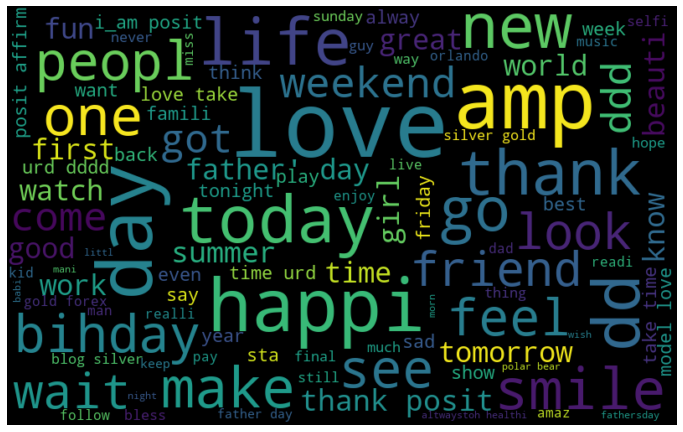

In [ ]:
#non_hate_tweets
normal_words = ' '.join([word for word in data_frame['clean_tweet'][data_frame['label'] == 0]])
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110,max_words = 100).generate(normal_words)
print('Normal words')
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear',cmap='viridis')
plt.axis('off')

Normal words


(-0.5, 799.5, 499.5, -0.5)

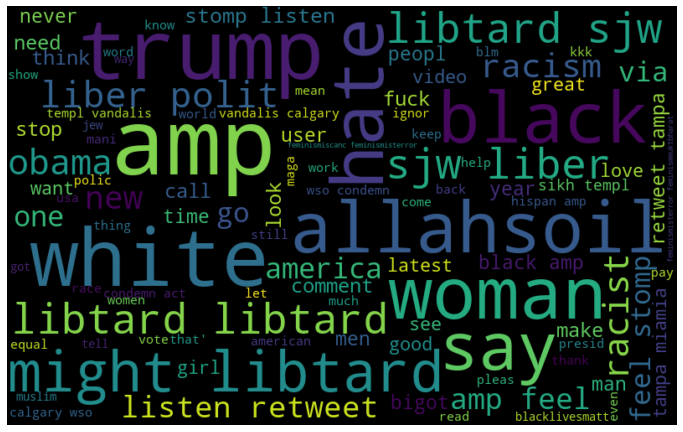

In [ ]:
#hate_tweets
normal_words = ' '.join([word for word in data_frame['clean_tweet'][data_frame['label'] == 1]])
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110,max_words = 100).generate(normal_words)
print('Normal words')
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')

In [ ]:
#collecting positive and negative hashtags
hash_positive = []
hash_negative = []

In [ ]:
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [ ]:
# extracting hashtags from non-hate tweets
hash_positive = hashtag_extract(data_frame['clean_tweet'][data_frame['label'] == 0])

# extracting hashtags from racist/sexist tweets
hash_negative = hashtag_extract(data_frame['clean_tweet'][data_frame['label'] == 1])

# Converting a multidimensional list to a 1-D list
hash_positive = sum(hash_positive,[])
hash_negative = sum(hash_negative,[])

In [ ]:
q = Counter(hash_positive)
q = dict(q.most_common())
l_positive_count = list(q.values())
l_positive_count[0:4]

[1579, 905, 636, 558]

In [ ]:
r = Counter(hash_negative)
r = dict(r.most_common())
l_negative_count = list(r.values())
l_negative_count[0:4]

[133, 94, 92, 79]

In [ ]:
l_positive_values = list(q.keys())
l_positive_values[0:4]

['love', 'posit', 'smile', 'healthi']

In [ ]:
l_negative_values = list(r.keys())
l_negative_values[0:4]

['trump', 'polit', 'allahsoil', 'liber']

In [ ]:
#creating a dataframe to represent top 20 positive and top 20 negative hashwords
l1 = pd.DataFrame(l_positive_values[0:20],columns = ['Positive_Words'])
l2 = pd.DataFrame(l_positive_count[0:20],columns = ['Positive_Count'])
l3 = pd.DataFrame(l_negative_values[0:20],columns = ['Negative_Words'])
l4 = pd.DataFrame(l_negative_count[0:20],columns = ['Negative_Count'])
z = pd.concat([l1,l2,l3,l4],axis = 1)
z

,Positive_Words,Positive_Count,Negative_Words,Negative_Count
0,love,1579,trump,133
1,posit,905,polit,94
2,smile,636,allahsoil,92
3,healthi,558,liber,79
4,thank,526,libtard,77
5,fun,434,sjw,75
6,affirm,422,retweet,57
7,life,399,black,46
8,model,374,miamia,38
9,summer,361,hate,36


In [ ]:
#Animated plot for positive words with their frequency
fig = px.bar(z, x="Positive_Words", y="Positive_Count",animation_frame="Positive_Count",
            hover_name="Positive_Words")
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1200
fig.show()

In [ ]:
# Animated plot for negative words with their frequency
fig = px.bar(z, x="Negative_Words", y="Negative_Count",animation_frame="Negative_Count",
            hover_name="Negative_Words")
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1200
fig.show()

In [ ]:
#Normal histogram of positive words
fig = px.bar(z, x="Positive_Words", y="Positive_Count",
            hover_name="Positive_Words",color = 'Positive_Count')
fig.show()

In [ ]:
#Normal histogram of negative words
fig = px.bar(z, x="Negative_Words", y="Negative_Count",
            hover_name="Negative_Words",color= 'Negative_Count')
fig.show()

In [ ]:
data_frame.head()

,id,label,tweet,clean_tweet,Count(#)
0,1,0,@user when a father is dysfunctional and is s...,father dysfunct selfish drag kid dysfunction. ...,#run
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit can't use caus offer wheelc...,#lyft #disapointed #getthanked
2,3,0,bihday your majesty,bihday majesti,
3,4,0,#model i love u take with u all the time in ...,#model love u take u time urd+-!!! dddd d|d|d|,#model
4,5,0,factsguide: society now #motivation,factsguide: societi #motiv,#motivation


In [ ]:
#Techniques to convert the tweets into Bag-of-Words, TF-IDF, and Word Embeddings
#Building various classifiers:
#TF-IDF approach
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2,stop_words='english')
#TF-IDF feature matrix
X1 = tfidf_vectorizer.fit_transform(corpus).toarray()
Y1 = df.loc[:,'label'].values

In [ ]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(data_frame['clean_tweet'], data_frame['label'], test_size = 0.3, random_state=0, shuffle = True, stratify=data_frame['label'])
vectorizer = TfidfVectorizer()
X1_train_vect = vectorizer.fit_transform(X1_train)
Y1 = df.loc[:,'label'].values

In [ ]:
#Random Forest using pipelines
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
rf = Pipeline([('tfidf', TfidfVectorizer()), ('rf', RandomForestClassifier())])
rf.fit(X1_train, Y1_train)
y_pred = rf.predict(X1_test)
print(pd.crosstab(Y1_test,y_pred,rownames=['Actual'],colnames=['Predicted']))
print(classification_report(Y1_test, y_pred))

Predicted     0    1
Actual              
0          8886   30
1           342  331
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      8916
           1       0.92      0.49      0.64       673

    accuracy                           0.96      9589
   macro avg       0.94      0.74      0.81      9589
weighted avg       0.96      0.96      0.96      9589



In [ ]:
print(rf.predict([""]))

[0]


In [ ]:
import numpy as np

In [ ]:
data_frame.drop('id',axis=1,inplace = True)

In [ ]:
data_frame.drop('tweet',axis=1,inplace = True)

In [ ]:
data_frame.drop('Count(#)',axis=1,inplace = True)

In [ ]:
data_frame.head()

,label,clean_tweet
0,0,father dysfunct selfish drag kid dysfunction. ...
1,0,thank #lyft credit can't use caus offer wheelc...
2,0,bihday majesti
3,0,#model love u take u time urd+-!!! dddd d|d|d|
4,0,factsguide: societi #motiv


In [ ]:
df = data_frame

In [ ]:
df.head()

,label,clean_tweet
0,0,father dysfunct selfish drag kid dysfunction. ...
1,0,thank #lyft credit can't use caus offer wheelc...
2,0,bihday majesti
3,0,#model love u take u time urd+-!!! dddd d|d|d|
4,0,factsguide: societi #motiv


In [ ]:
dff = df.drop(['label'], axis = 1)

In [ ]:
dff.head()

,clean_tweet
0,father dysfunct selfish drag kid dysfunction. ...
1,thank #lyft credit can't use caus offer wheelc...
2,bihday majesti
3,#model love u take u time urd+-!!! dddd d|d|d|
4,factsguide: societi #motiv


In [ ]:
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(dff, list(df.label), test_size=0.1)

In [ ]:
X_test.shape

(3197, 1)

In [ ]:
X_temp.shape

(28765, 1)

In [ ]:
type(y_temp)

list

In [ ]:
X_temp['label'] = y_temp

In [ ]:
X_temp.head()

,clean_tweet,label
29613,tri #wed #suit 1st time today much dddddd'dd(c)ao,0
26750,today day #mikael #josemorenobrook #premier,0
14449,adam saleh racist #adamsaleh,1
7119,ok nowadays? question latest blog. sure world ...,0
20781,sleep till least watch one episod oitnb tonight.,0


In [ ]:
X_temp.label[2]

0

In [ ]:
type(X_temp)

pandas.core.frame.DataFrame

pandas.core.frame.DataFrame

In [ ]:
nonhate = X_temp[X_temp['label'] == 0]

In [ ]:
nonhate.head()

,clean_tweet,label
29613,tri #wed #suit 1st time today much dddddd'dd(c)ao,0
26750,today day #mikael #josemorenobrook #premier,0
7119,ok nowadays? question latest blog. sure world ...,0
20781,sleep till least watch one episod oitnb tonight.,0
17091,#model love u take u time urd+-!!! dddd d|d|d|,0


In [ ]:
hate = X_temp[X_temp.label == 1]

In [ ]:
hate.shape[0]

2008

In [ ]:
nonhatesample = nonhate.sample(n = hate.shape[0])

In [ ]:
nonhatesample.head()

,clean_tweet,label
4984,#smaphon bull up: domin bull direct whatev wan...,0
29519,user!,0
26076,truer word never spoken. that' reason he' nomi...,0
455,name upcom new track? dd #2pm #kpop,0
13408,*bows* thank,0


In [ ]:
nonhatesample.shape

(2008, 2)

In [ ]:
ds = pd.concat([hate, nonhatesample], axis = 0)

In [ ]:
ds.tail()

,clean_tweet,label
6932,#smilepowerday! show u best cheesi grin pearli...,0
15574,sick feel stupid sorri everyon mess sorri weir...,0
8469,becom talent film maker ? turn polit stoog #aap !,0
14389,#red #bird real life? 'cranky' cardin dead rin...,0
5825,get #up get get #enjoy #music #today #free #ap...,0


In [ ]:
ds.shape

(4016, 2)

In [ ]:
ds.to_csv("/content/train1.zip")

In [ ]:
ds = pd.read_csv("/content/train1.zip")

In [ ]:
ds.head()

,Unnamed: 0,clean_tweet,label
0,14449,adam saleh racist #adamsaleh,1
1,3473,talk obama #bigotry. stay topic.,1
2,16638,remark racist even utter wife. #carlpaladino i...,1
3,26252,"""tackl system racism bia empathy"" read: #sdg #...",1
4,26239,"#allahsoil market crash march 2000, greenspan ...",1


In [ ]:
ds_temp = ds

In [ ]:
testdf = X_test
testdf['label'] = y_test

In [ ]:
testdf.shape

(3197, 2)

In [ ]:
ds = pd.concat([ds_temp, testdf], axis = 0)

In [ ]:
ds.head()

,Unnamed: 0,clean_tweet,label
0,14449.0,adam saleh racist #adamsaleh,1
1,3473.0,talk obama #bigotry. stay topic.,1
2,16638.0,remark racist even utter wife. #carlpaladino i...,1
3,26252.0,"""tackl system racism bia empathy"" read: #sdg #...",1
4,26239.0,"#allahsoil market crash march 2000, greenspan ...",1


In [ ]:
ds.shape

(7213, 3)

In [ ]:
testdf.head()

,clean_tweet,label
18474,"#linkinmybio renemo0dy: opc3 final came!! aoi,...",0
4910,work #freestyle#hair#hairstyle#hairdress #than...,0
15015,video men woman malay hot super sexi girl,1
31731,close eye radic islam radic islam radic islam....,0
13141,photographer/aist: look !!!!| #rumbleoutthebox...,0


In [ ]:
list(testdf.index)

[18474,
 4910,
 15015,
 31731,
 13141,
 30460,
 29425,
 8129,
 8585,
 24132,
 24972,
 31536,
 14922,
 8751,
 19332,
 25737,
 10940,
 22608,
 5530,
 21729,
 18099,
 13344,
 23455,
 5975,
 17447,
 31855,
 22566,
 4228,
 21391,
 29109,
 20312,
 5896,
 25453,
 494,
 19097,
 31631,
 10517,
 24060,
 19288,
 23619,
 26790,
 29149,
 24657,
 4516,
 19429,
 15576,
 19526,
 4555,
 23392,
 7148,
 9313,
 29217,
 2840,
 2353,
 5878,
 13615,
 16645,
 4018,
 15268,
 9197,
 16629,
 13512,
 17663,
 6970,
 4702,
 4116,
 25685,
 3600,
 22331,
 25601,
 14998,
 16772,
 8514,
 12126,
 16296,
 27391,
 15869,
 8598,
 16294,
 25565,
 846,
 2397,
 2918,
 22116,
 8324,
 937,
 22584,
 1382,
 16774,
 474,
 11172,
 27951,
 6249,
 11346,
 13216,
 17848,
 21206,
 8844,
 8321,
 3073,
 4039,
 4634,
 16239,
 12494,
 8697,
 18022,
 24879,
 25243,
 12916,
 6389,
 3658,
 5663,
 25779,
 20035,
 27558,
 1361,
 26852,
 20525,
 20011,
 1135,
 14999,
 8964,
 2296,
 5496,
 2220,
 1768,
 501,
 4066,
 1041,
 3322,
 4063,
 3759,
 85

In [ ]:
corpus = []
for i in range(ds.shape[0]):
    corpus.append(ds.iloc[i][0])

In [ ]:
corpus

[14449.0,
 3473.0,
 16638.0,
 26252.0,
 26239.0,
 21792.0,
 16273.0,
 14297.0,
 13102.0,
 21940.0,
 18497.0,
 17269.0,
 25638.0,
 3019.0,
 6103.0,
 27111.0,
 19495.0,
 6518.0,
 17763.0,
 31765.0,
 16871.0,
 30831.0,
 16522.0,
 16332.0,
 21647.0,
 24185.0,
 24192.0,
 10645.0,
 25664.0,
 28391.0,
 23251.0,
 17280.0,
 2175.0,
 8604.0,
 15740.0,
 21555.0,
 16621.0,
 30921.0,
 26110.0,
 20269.0,
 8466.0,
 23783.0,
 8803.0,
 31228.0,
 14270.0,
 25384.0,
 19051.0,
 9342.0,
 27333.0,
 26537.0,
 12189.0,
 22279.0,
 5331.0,
 29899.0,
 31947.0,
 7537.0,
 7696.0,
 12763.0,
 23481.0,
 20277.0,
 18544.0,
 34.0,
 23129.0,
 6951.0,
 24970.0,
 1633.0,
 1317.0,
 14397.0,
 12704.0,
 31817.0,
 10755.0,
 979.0,
 21622.0,
 20971.0,
 167.0,
 12129.0,
 18282.0,
 4186.0,
 863.0,
 16931.0,
 19541.0,
 3059.0,
 31789.0,
 3491.0,
 21964.0,
 11751.0,
 15386.0,
 16178.0,
 987.0,
 8169.0,
 8905.0,
 7592.0,
 11791.0,
 8399.0,
 24775.0,
 12585.0,
 3307.0,
 25501.0,
 21388.0,
 31201.0,
 23986.0,
 1400.0,
 12676.0,
 6998